In [1]:
!pip install ultralytics --quiet
!pip install roboflow --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.11 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.2 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.8.1 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflowjs 4.16.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.


In [2]:
import os
from IPython import display
display.clear_output()

from ultralytics import YOLO
from IPython.display import display, Image
from PIL import Image as I
from PIL import ImageDraw,ImageFont
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
import torch
from tqdm import tqdm

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.2/8062.4 GB disk)


In [3]:
rf = Roboflow(api_key="TUbjzyIipJTrvQqlV7Tv")
project = rf.workspace("minor-project-i54la").project("segment_shoe")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.15, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to segment_shoe-1 in yolov8:: 100%|██████████| 6252/6252 [00:01<00:00, 3319.72it/s]


In [4]:
# Helper functions start here
def maskVisualize(image, mask):
    fontsize = 18
    f, ax = plt.subplots(2, 1, figsize=(8, 8))
    ax[0].imshow(image)
    ax[1].imshow(mask)

In [ ]:
!cat /kaggle/working/segment_shoe-1/data.yaml

In [5]:
!sed -i "s#segment_shoe-1/train/images#train/images#g" /kaggle/working/segment_shoe-1/data.yaml
!sed -i "s#segment_shoe-1/valid/images#valid/images#g" /kaggle/working/segment_shoe-1/data.yaml

In [10]:
!cat /kaggle/working/Shoes-Seg-4/data.yaml

cat: /kaggle/working/Shoes-Seg-4/data.yaml: No such file or directory


In [6]:
model = YOLO('yolov8m-seg.pt')

100%|██████████| 52.4M/52.4M [00:00<00:00, 219MB/s]


In [7]:
results = model.train(data='/kaggle/working/segment_shoe-1/data.yaml', epochs=25)

Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/kaggle/working/segment_shoe-1/data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

100%|██████████| 755k/755k [00:00<00:00, 39.2MB/s]
2024-02-19 10:12:21,073	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-19 10:12:21,887	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-19 10:12:24.282271: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 10:12:24.282410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 10:12:24.410837: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 149MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/segment_shoe-1/train/labels... 2432 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2432/2432 [00:04<00:00, 543.76it/s]


train: New cache created: /kaggle/working/segment_shoe-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/segment_shoe-1/valid/labels... 340 images, 0 backgrounds, 0 corrupt: 100%|██████████| 340/340 [00:00<00:00, 412.20it/s]

val: New cache created: /kaggle/working/segment_shoe-1/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/25      8.93G     0.4867     0.6804     0.7003     0.9923         32        640: 100%|██████████| 152/152 [02:11<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.76it/s]

                   all        340        340      0.589      0.737        0.7      0.483      0.584      0.724      0.685      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/25      9.13G      0.645     0.8566     0.6284      1.074         37        640: 100%|██████████| 152/152 [02:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        340        340       0.72      0.529      0.664      0.465      0.707      0.512      0.633      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/25      9.28G     0.6507     0.8476     0.5906      1.075         37        640: 100%|██████████| 152/152 [02:07<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        340        340      0.933      0.918      0.952      0.782      0.942      0.911      0.949      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/25      9.29G     0.6137     0.8081     0.5549      1.053         41        640: 100%|██████████| 152/152 [02:07<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        340        340       0.86      0.759      0.823      0.681      0.838      0.738      0.791      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/25      9.25G     0.5535     0.7033     0.4951      1.026         36        640: 100%|██████████| 152/152 [02:07<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        340        340      0.917      0.841      0.925       0.76      0.916      0.837      0.905      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/25      9.25G     0.5063     0.6536     0.4467     0.9939         36        640: 100%|██████████| 152/152 [02:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        340        340      0.968      0.982      0.988      0.897      0.968      0.982      0.983       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/25      9.23G     0.4799     0.5903     0.4154      0.989         50        640: 100%|██████████| 152/152 [02:07<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        340        340      0.977      0.968      0.989      0.905      0.978      0.962      0.989      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/25      9.24G     0.4642     0.5928     0.3995     0.9772         34        640: 100%|██████████| 152/152 [02:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        340        340      0.967      0.962      0.991      0.906      0.973      0.971      0.991      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/25      9.14G     0.4405     0.5548     0.3959      0.959         38        640: 100%|██████████| 152/152 [02:06<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        340        340      0.989      0.988      0.994      0.939      0.989      0.988      0.994      0.952



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/25      9.14G     0.4216     0.5219     0.3605     0.9488         43        640: 100%|██████████| 152/152 [02:07<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        340        340      0.956      0.974      0.986      0.919      0.959      0.976      0.986      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/25      9.14G     0.3867     0.5031     0.3336     0.9436         43        640: 100%|██████████| 152/152 [02:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        340        340      0.988      0.986      0.994      0.941      0.988      0.986      0.994       0.95



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/25      9.17G     0.3813     0.4805     0.3191      0.939         48        640: 100%|██████████| 152/152 [02:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all        340        340      0.992      0.979      0.994      0.948      0.992      0.979      0.994      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/25      8.78G     0.3632     0.4765     0.3139     0.9244         46        640: 100%|██████████| 152/152 [02:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        340        340      0.987      0.976      0.991      0.943      0.987      0.976      0.991      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/25      8.78G     0.3398     0.4259     0.2869     0.9199         42        640: 100%|██████████| 152/152 [02:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        340        340      0.988      0.979      0.993      0.949      0.988      0.979      0.993      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/25      8.78G     0.3338     0.3946     0.2734     0.9134         38        640: 100%|██████████| 152/152 [02:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        340        340      0.985      0.991      0.994      0.965      0.985      0.991      0.994      0.973


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/25      9.16G     0.3029     0.3603     0.2652     0.8733         16        640: 100%|██████████| 152/152 [02:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        340        340      0.987      0.988      0.993      0.944      0.987      0.988      0.993      0.966



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/25      9.06G     0.3018     0.3562      0.258     0.8775         16        640: 100%|██████████| 152/152 [01:57<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        340        340      0.988      0.991      0.994      0.962      0.988      0.991      0.994      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/25      9.06G      0.271     0.3398     0.2317     0.8559         16        640: 100%|██████████| 152/152 [01:58<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        340        340      0.996      0.985      0.995      0.964      0.996      0.985      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/25      9.06G     0.2629      0.314      0.224      0.853         16        640: 100%|██████████| 152/152 [01:57<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        340        340      0.985      0.988      0.994      0.961      0.985      0.988      0.994      0.973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/25      9.06G     0.2512     0.2985     0.2078     0.8465         16        640: 100%|██████████| 152/152 [01:57<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        340        340      0.988      0.988      0.994      0.971      0.988      0.988      0.994       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/25      8.98G     0.2337     0.2874     0.1955     0.8462         16        640: 100%|██████████| 152/152 [01:57<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]

                   all        340        340      0.993      0.988      0.993       0.97      0.993      0.988      0.993      0.979



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/25      8.94G     0.2207     0.2614     0.1825     0.8292         16        640: 100%|██████████| 152/152 [01:57<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        340        340      0.988      0.991      0.995      0.973      0.988      0.991      0.995      0.979



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/25      8.94G      0.203     0.2632     0.1685     0.8234         17        640: 100%|██████████| 152/152 [01:57<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        340        340      0.985      0.991      0.994      0.967      0.985      0.991      0.994      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/25      8.94G     0.1879     0.2504     0.1605     0.8219         16        640: 100%|██████████| 152/152 [01:57<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        340        340      0.988      0.982      0.994      0.972      0.988      0.982      0.994      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/25      9.15G     0.1757     0.2382     0.1439     0.8137         16        640: 100%|██████████| 152/152 [01:57<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]

                   all        340        340      0.985      0.989      0.994      0.974      0.985      0.989      0.994      0.981



25 epochs completed in 0.917 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 54.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]


                   all        340        340      0.985      0.989      0.994      0.974      0.985      0.989      0.994      0.981
Speed: 0.1ms preprocess, 8.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/segment/train


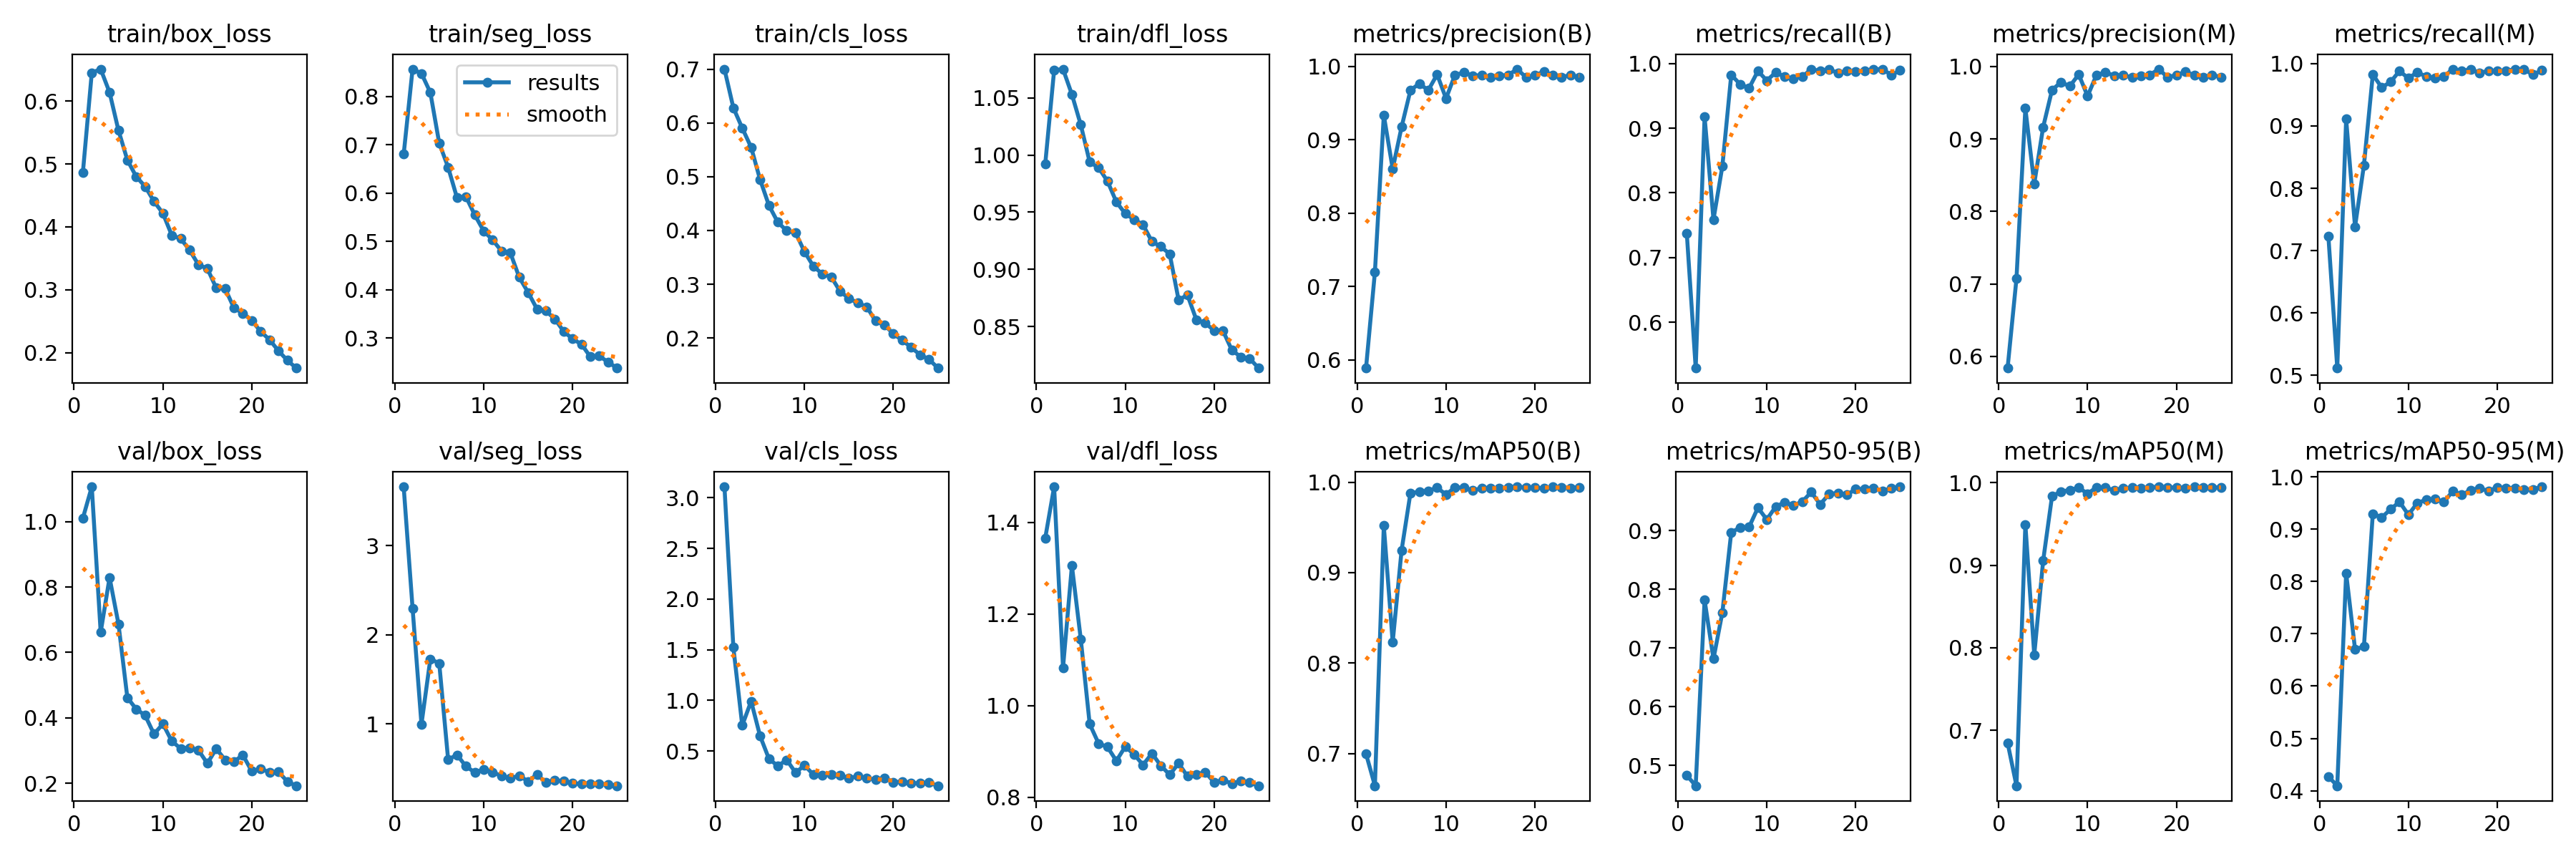

In [8]:
Image(filename=f'{os.getcwd()}/runs/segment/train/results.png', width=600)

In [10]:
impath = "/kaggle/working/segment_shoe-1/test/images/VID_20240206_182903_494_jpg.rf.c4bb4f53a540a32162d490db2e4f23f9.jpg"
!yolo task=segment mode=predict model={os.getcwd()}/runs/segment/train/weights/best.pt conf=0.80 source={impath}

Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /kaggle/working/segment_shoe-1/test/images/VID_20240206_182903_494_jpg.rf.c4bb4f53a540a32162d490db2e4f23f9.jpg: 640x640 1 Shoes, 18.5ms
Speed: 6.9ms preprocess, 18.5ms inference, 429.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


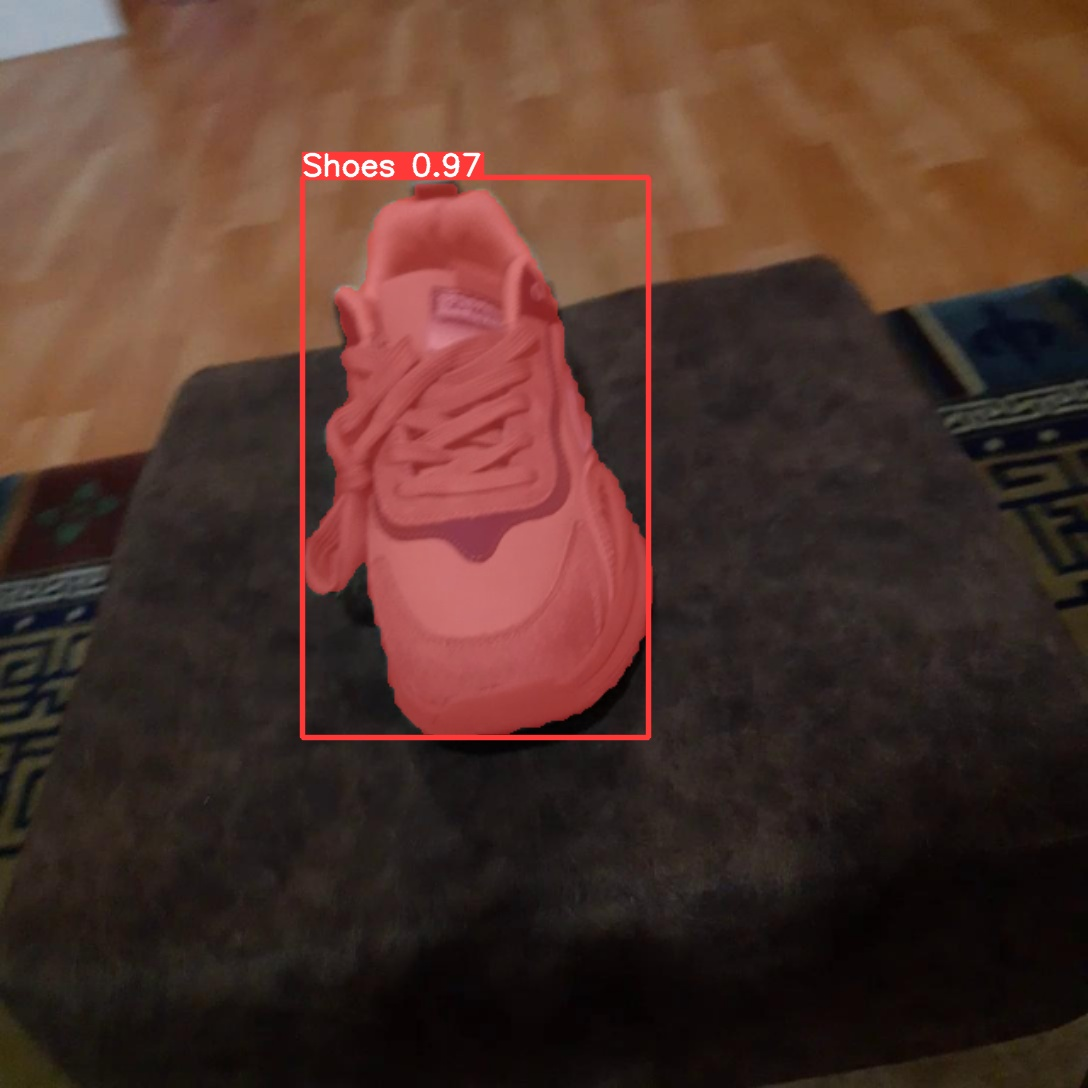

In [11]:
display(Image(filename=f"/kaggle/working/runs/segment/predict/VID_20240206_182903_494_jpg.rf.c4bb4f53a540a32162d490db2e4f23f9.jpg", height=600))

In [12]:
# seg_model = YOLO('/kaggle/input/segment/yolo-segment.pt')
seg_model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')

In [13]:
images = os.listdir("/kaggle/working/segment_shoe-1/test/images/")


0: 384x640 1 Shoes, 17.7ms
Speed: 2.9ms preprocess, 17.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


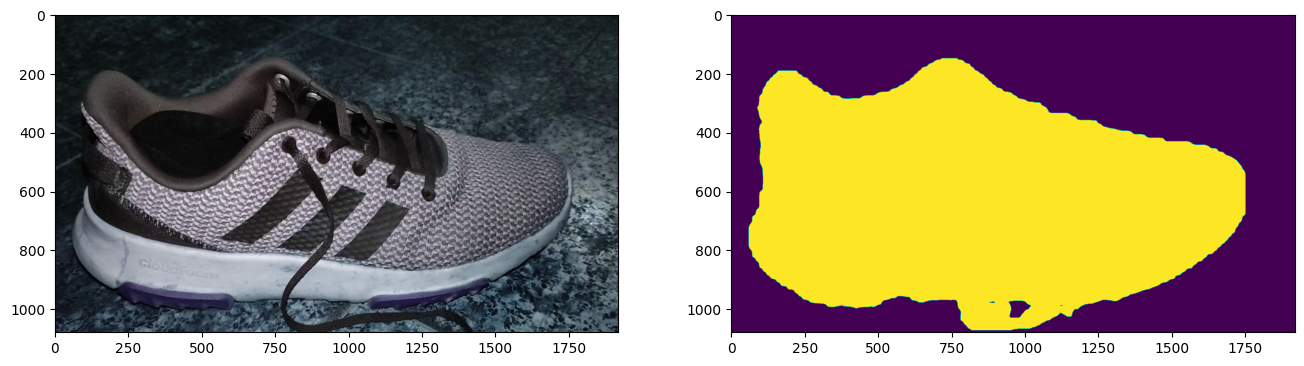

In [32]:
index = np.random.randint(len(images)-1)
path = f'/kaggle/working/segment_shoe-1/test/images/{images[index]}'
annot_name = ".".join(images[index].split('.')[:-1])
annotation_path = f"/kaggle/working/segment_shoe-1/test/labels/{annot_name}.txt"
image = cv2.imread(path)
results = seg_model(image, retina_masks=True)

mask = results[0].masks.data
mask = mask.permute(0, 1, 2)

_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image)
axes[1].imshow(mask.cpu().permute(1,2,0))

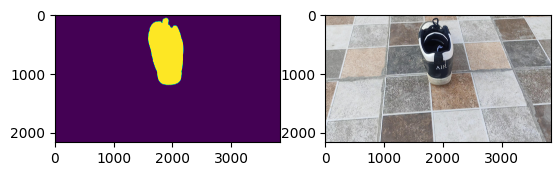

In [23]:
with open(annotation_path,"r") as f:
    poly_boundaries = []
    for line in f.readlines():
        coords = (line.split(' ')[1:])
        xy = np.array(coords,dtype=np.float32).reshape((-1,2))
      

        image = I.open(path)
        width, height  = image.size
        xy[:,0] *= width
        xy[:,1] *= height
        poly_boundaries.append(xy.astype(np.int32))
    img = np.zeros((height,width))
    mask_true = cv2.fillPoly(img,poly_boundaries,255)

plt.subplot(1,2,1)
plt.imshow(mask_true)
plt.subplot(1,2,2)
plt.imshow(image)
plt.show()

In [16]:
print(mask.shape, mask_true.shape)

torch.Size([1, 2160, 3840]) (2160, 3840)


In [41]:
mask1 = mask.reshape(1, -1).int()
mask2 = torch.tensor(mask_true).unsqueeze(0).reshape(1, -1).int()
mask2[mask2==255] = 1

In [46]:
type(ultralytics.utils.metrics.mask_iou(mask1, mask2).item())

float

In [69]:
results[0].orig_img.shape

(720, 1280, 3)

In [34]:
#IOU calculation
images = os.listdir("/kaggle/working/segment_shoe-1/test/images/")
sum_iou = 0
for image in tqdm(images):
    #get prediction
    path = f'/kaggle/working/segment_shoe-1/test/images/{image}'
    annot_name = ".".join(image.split('.')[:-1])
    annotation_path = f"/kaggle/working/segment_shoe-1/test/labels/{annot_name}.txt"
    image = cv2.imread(path)
    results = seg_model(image, retina_masks=True, iou=0.5, verbose=False)
    
    if results[0].masks is None:
        mask = torch.zeros(1, results[0].orig_img.shape[0], results[0].orig_img.shape[1])
    else:
        mask = results[0].masks.data
    mask = mask.permute(0, 1, 2)
    
    #read true mask
    with open(annotation_path,"r") as f:
        poly_boundaries = []
        for line in f.readlines():
            coords = (line.split(' ')[1:])
            xy = np.array(coords,dtype=np.float32).reshape((-1,2))


            image = I.open(path)
            width, height  = image.size
            xy[:,0] *= width
            xy[:,1] *= height
            poly_boundaries.append(xy.astype(np.int32))
        img = np.zeros((height,width))
        mask_true = cv2.fillPoly(img,poly_boundaries,255)
    
#     print(mask.shape, mask_true.shape)
    if mask.shape[0] > 1:
        mask = mask[0,:,:].unsqueeze(0)
    
    mask1 = mask.reshape(1, -1).int()
    mask2 = torch.tensor(mask_true).unsqueeze(0).reshape(1, -1).int()
    mask2[mask2==255] = 1
    
    sum_iou += ultralytics.utils.metrics.mask_iou(mask1.cpu(), mask2).item()
    
print("IOU: ", sum_iou / len(images))

100%|██████████| 348/348 [00:32<00:00, 10.56it/s]

IOU:  0.9568905843978469


In [66]:
print(mask_true.shape, mask.shape)

(720, 1280)